In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
baseline = pd.read_csv("results/baseline.csv")
baseline

,language,train_f1,val_f1,test_f1
0,mg,0.993728,0.933673,0.960352
1,fo,0.974224,0.897482,0.901099
2,co,0.956204,0.852308,0.813230
3,hsb,0.951443,0.923387,0.854578
4,bh,0.981549,0.888689,0.802120
5,cv,0.977741,0.892617,0.830443


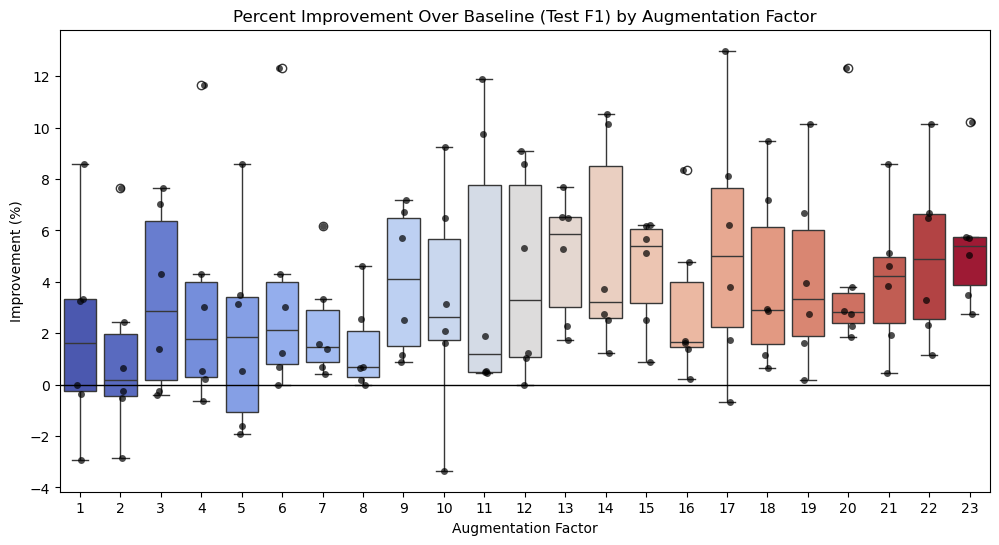

In [18]:
# Load transfer (augmented) data
df = pd.read_csv("results/transfer_learning.csv")

# Visualization using Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="augmentation_factor", y="improvement", legend=False, hue="augmentation_factor", palette="coolwarm")
sns.stripplot(data=df, x="augmentation_factor", y="improvement", color="black", jitter=True, alpha=0.7)

plt.axhline(y=0, color="black", linewidth=1)
plt.title("Percent Improvement Over Baseline (Test F1) by Augmentation Factor")
plt.xlabel("Augmentation Factor")
plt.ylabel("Improvement (%)")
plt.show()

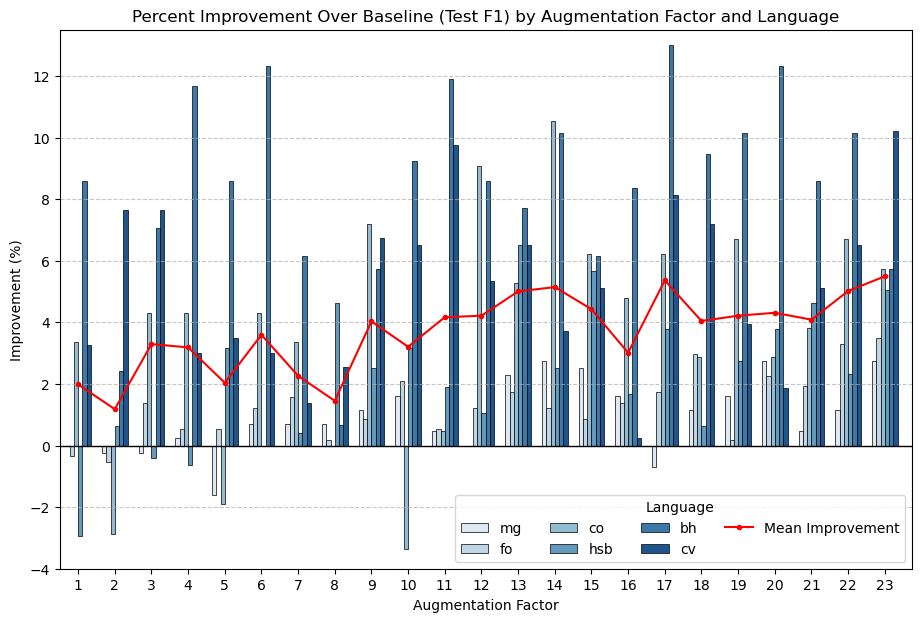

In [19]:
# Visualization using Seaborn
plt.figure(figsize=(11, 7))
ax = sns.barplot(
    data=df, x="augmentation_factor", y="improvement", hue="low_resource_lang",
    palette="Blues", dodge=True, width=0.7, edgecolor="black", linewidth=0.5
)

language_avgs = df.groupby("augmentation_factor")["improvement"].mean()

plt.plot(range(max(language_avgs.index)), language_avgs, color="red", marker=".", label="Mean Improvement")

plt.axhline(y=0, color="black", linewidth=1)
plt.title("Percent Improvement Over Baseline (Test F1) by Augmentation Factor and Language")
plt.xlabel("Augmentation Factor")
plt.ylabel("Improvement (%)")
plt.legend(title="Language", loc="lower right", ncol=4)

# Improve readability
plt.xticks(rotation=0)
plt.ylim(-4, 13.5)
plt.xlim(-0.5, max(df["augmentation_factor"]) - 0.25)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

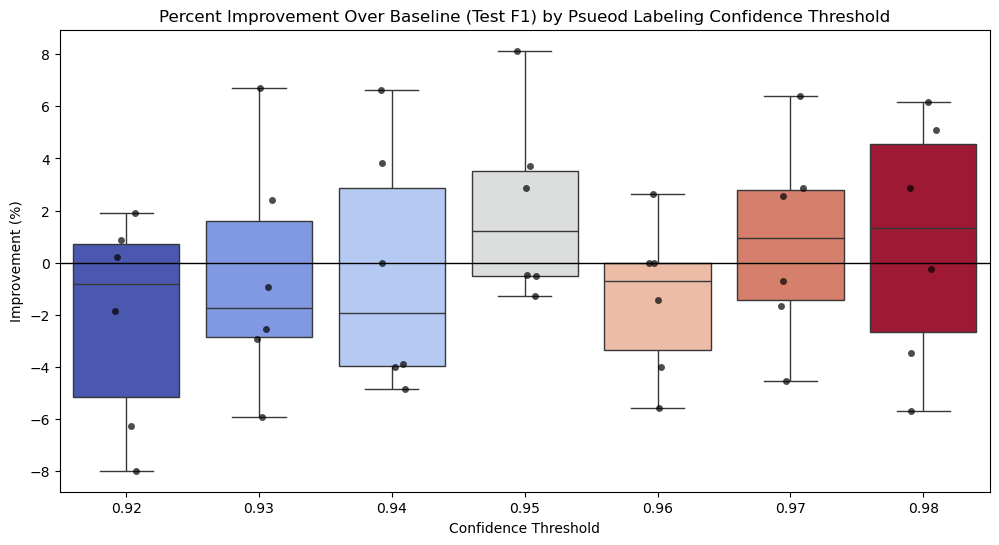

In [20]:
# Load transfer (augmented) data
df = pd.read_csv("results/iterative_pseudo_labeling.csv")

# Visualization using Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="threshold", y="improvement", hue="threshold", palette="coolwarm", legend=False)
sns.stripplot(data=df, x="threshold", y="improvement", color="black", jitter=True, alpha=0.7)

plt.axhline(y=0, color="black", linewidth=1)  # Reference line at 0%
plt.title("Percent Improvement Over Baseline (Test F1) by Psueod Labeling Confidence Threshold")
plt.xlabel("Confidence Threshold")
plt.ylabel("Improvement (%)")
plt.show()

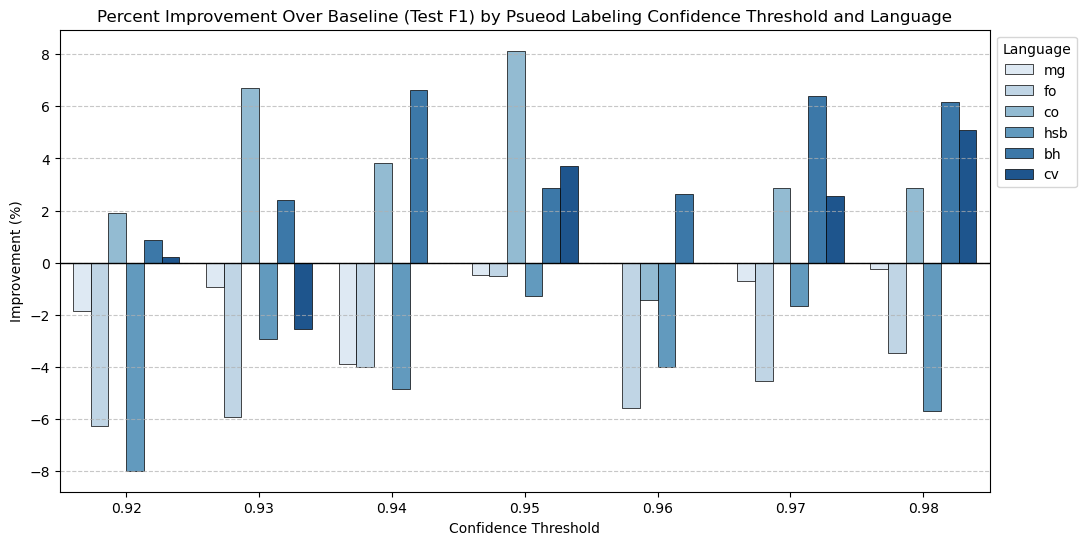

In [21]:
# Visualization using Seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=df, x="threshold", y="improvement", hue="language",
    palette="Blues", dodge=True, width=0.8, edgecolor="black", linewidth=0.5
)

plt.axhline(y=0, color="black", linewidth=1)  # Reference line at 0%
plt.title("Percent Improvement Over Baseline (Test F1) by Psueod Labeling Confidence Threshold and Language")
plt.xlabel("Confidence Threshold")
plt.ylabel("Improvement (%)")
plt.legend(title="Language", bbox_to_anchor=(1, 1))  # Move legend outside

# Improve readability
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add light grid lines

plt.show()